<a href="https://colab.research.google.com/github/juliatessler/datascience4health-2021/blob/main/notebooks/NHANES_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os dados estão no nosso drive. Aqui, você deve clicar no link depois de rodar a célula, copiar o código que a nova página vai te dar e colar aqui.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# Reading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
prefix = '/content/drive/MyDrive/Ciência de Dados e Saúde/Databases/NHANES/'

### 2005 - 2006

In [ ]:
demo4 = pd.read_sas(prefix+'2005-2006/DEMO_D.XPT')
auq4 = pd.read_sas(prefix+'2005-2006/AUQ_D.XPT')
aux4 = pd.read_sas(prefix+'2005-2006/AUX_D.XPT')
auxar4 = pd.read_sas(prefix+'2005-2006/AUXAR_D.XPT')
auxtym4 = pd.read_sas(prefix+'2005-2006/AUXTYM_D.XPT')

df4 = (demo4.join(auq4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df4_filtered = df4.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df4_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df4_filtered['years'] = '2005-2006'

In [ ]:
df4_filtered.head()

,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years
2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.0,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006
3,31130.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2005-2006
5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,30.0,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006
6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.0,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006
7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.0,15.0,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006


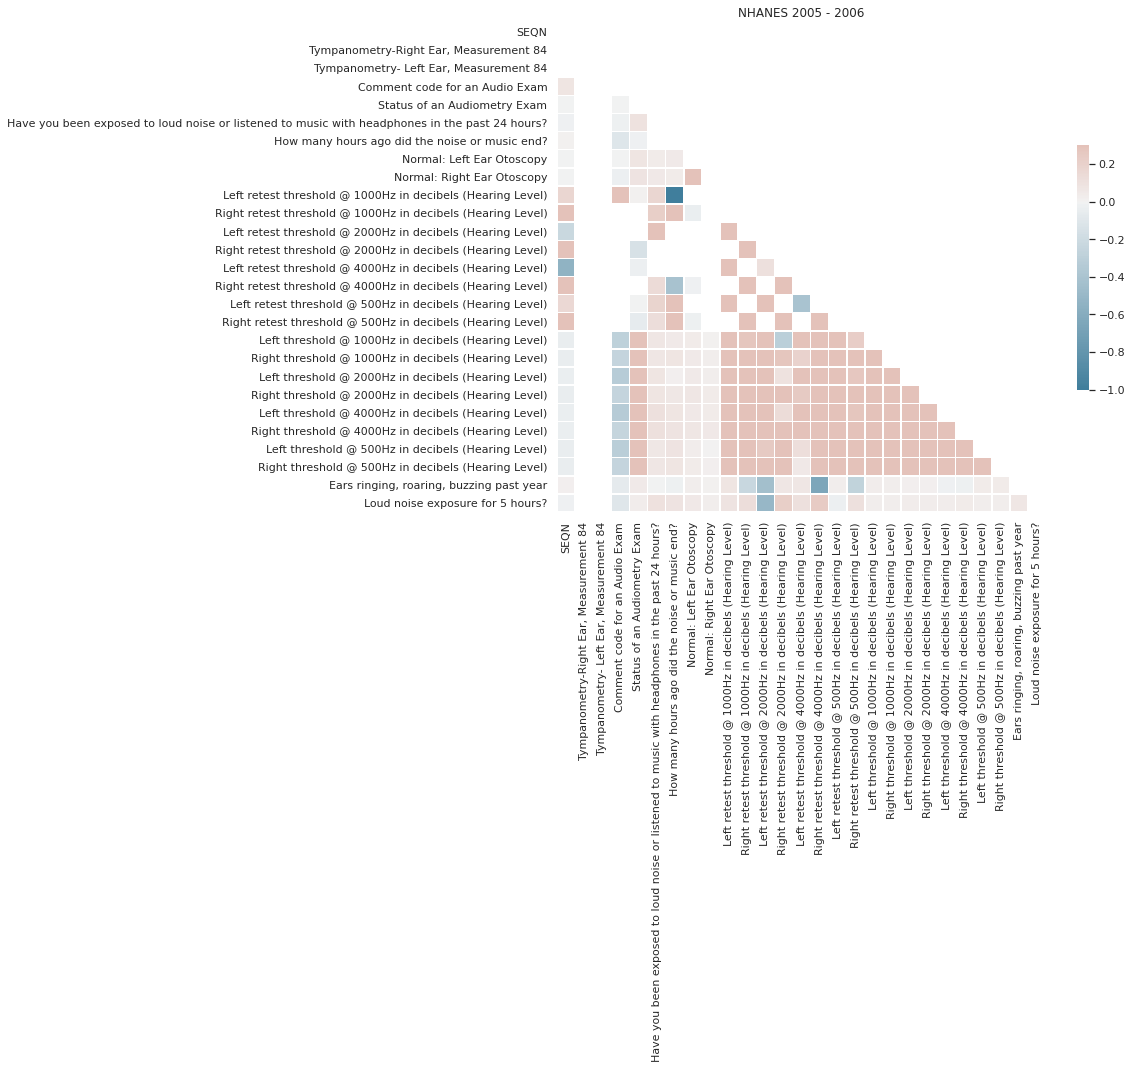

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df4_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES 2005 - 2006');

### 2007 - 2008

In [ ]:
demo5 = pd.read_sas(prefix+'2007-2008/DEMO_E.XPT')
auq5 = pd.read_sas(prefix+'2007-2008/AUQ_E.XPT')
aux5 = pd.read_sas(prefix+'2007-2008/AUX_E.XPT')
auxar5 = pd.read_sas(prefix+'2007-2008/AUXAR_E.XPT')
auxtym5 = pd.read_sas(prefix+'2007-2008/AUXTYM_E.XPT')

df5 = (demo5.join(auq5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df5_filtered = df5.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df5_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df5_filtered['years'] = '2007-2008'

In [ ]:
demo5.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,DMDBORN2,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDSCHOL,DMDMARTL,DMDHHSIZ,DMDFMSIZ,INDHHIN2,INDFMIN2,INDFMPIR,RIDEXPRG,DMDHRGND,DMDHRAGE,DMDHRBR2,DMDHREDU,DMDHRMAR,DMDHSEDU,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,41475.0,5.0,2.0,2.0,2.0,62.0,751.0,752.0,5.0,2.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0,2.0,2.0,6.0,6.0,1.83,NaN,1.0,64.0,1.0,4.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,59356.356426,60045.772497,1.0,60.0
1,41476.0,5.0,2.0,1.0,2.0,6.0,81.0,82.0,5.0,NaN,1.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,6.0,6.0,15.0,15.0,5.00,NaN,1.0,51.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,35057.218405,35353.210440,1.0,70.0
2,41477.0,5.0,2.0,2.0,1.0,71.0,859.0,860.0,3.0,1.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0,2.0,2.0,5.0,5.0,1.50,NaN,1.0,71.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9935.266183,10074.150074,1.0,67.0
3,41478.0,5.0,2.0,2.0,2.0,1.0,17.0,17.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,3.0,0.66,NaN,2.0,25.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,12846.712058,14560.472652,2.0,59.0
4,41479.0,5.0,2.0,1.0,1.0,52.0,629.0,630.0,1.0,2.0,2.0,1.0,6.0,NaN,1.0,NaN,1.0,5.0,5.0,8.0,8.0,2.20,NaN,1.0,52.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,8727.797555,9234.055759,1.0,70.0


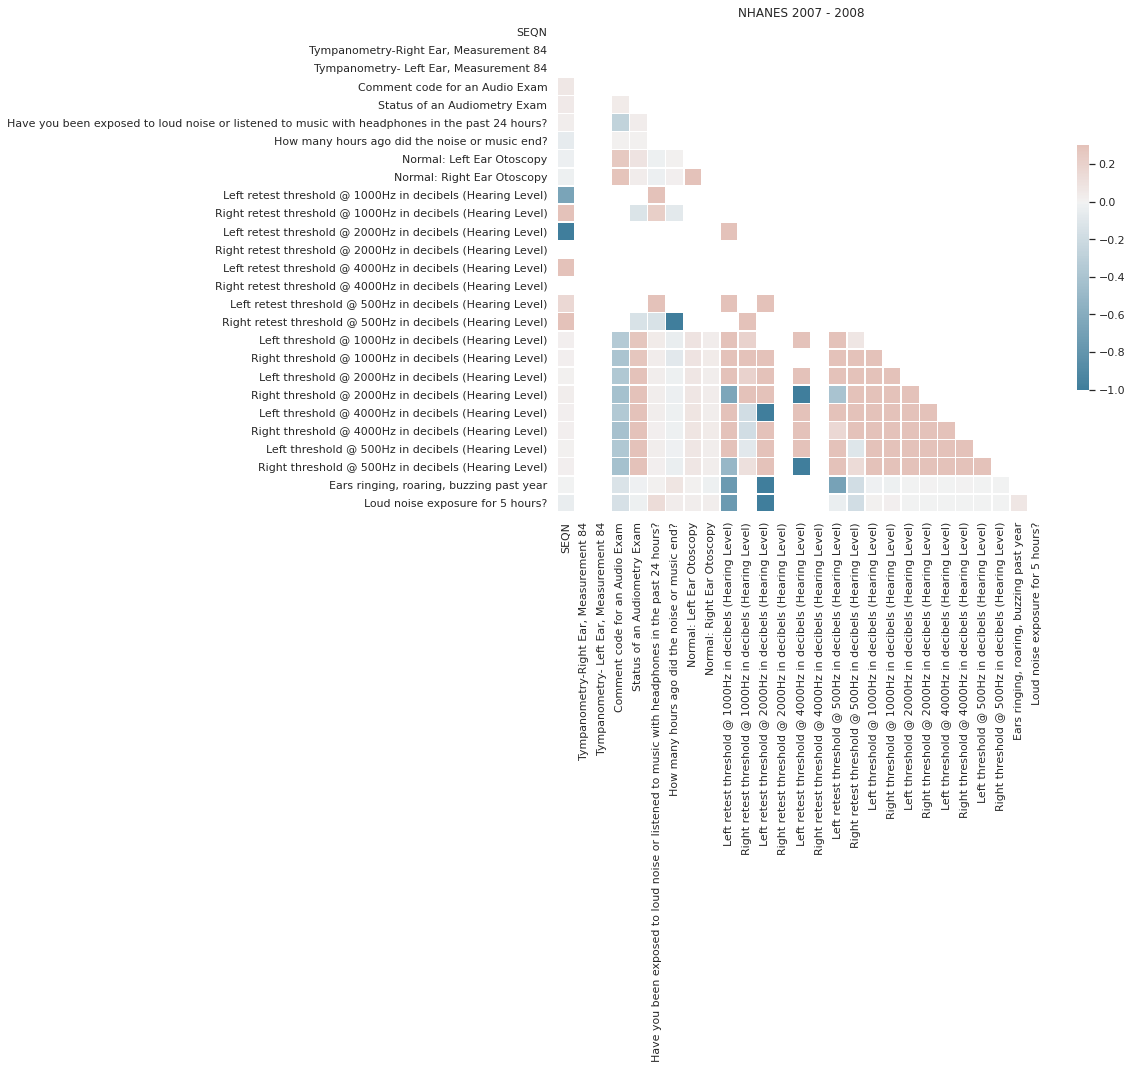

In [ ]:
# Compute the correlation matrix
corr = df5_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES 2007 - 2008');

### 2009 - 2010

In [ ]:
demo6 = pd.read_sas(prefix+'2009-2010/DEMO_F.XPT')
auq6 = pd.read_sas(prefix+'2009-2010/AUQ_F.XPT')
aux6 = pd.read_sas(prefix+'2009-2010/AUX_F.XPT')
auxar6 = pd.read_sas(prefix+'2009-2010/AUXAR_F.XPT')
auxtym6 = pd.read_sas(prefix+'2009-2010/AUXTYM_F.XPT')

df6 = (demo6.join(auq6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df6_filtered = df6.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df6_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df6_filtered['years'] = '2009-2010'

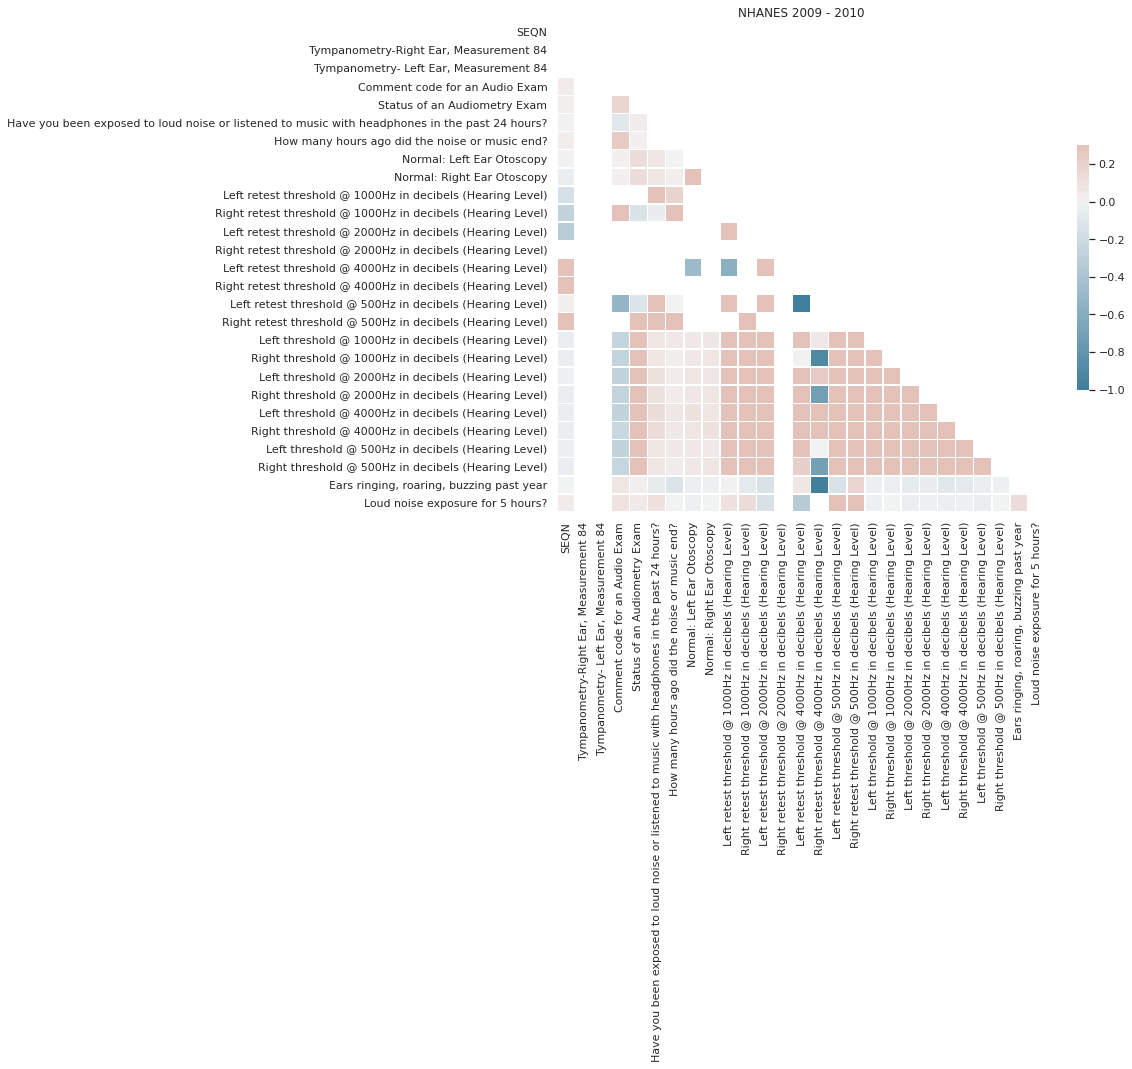

In [ ]:
# Compute the correlation matrix
corr = df6_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES 2009 - 2010');

### 2011 - 2012

In [ ]:
demo7 = pd.read_sas(prefix+'2011-2012/DEMO_G.XPT')
auq7 = pd.read_sas(prefix+'2011-2012/AUQ_G.XPT')
aux7 = pd.read_sas(prefix+'2011-2012/AUX_G.XPT')
auxar7 = pd.read_sas(prefix+'2011-2012/AUXAR_G.XPT')
auxtym7 = pd.read_sas(prefix+'2011-2012/AUXTYM_G.XPT')

df7 = (demo7.join(auq7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df7_filtered = df7.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ360',
     'AUQ370'
   ]
  )

df7_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ360': 'How long exposed to very loud noise',
    'AUQ370': 'Had off-work exposure to loud noise?'
    },
    inplace = True
)

df7_filtered['years'] = '2011-2012'

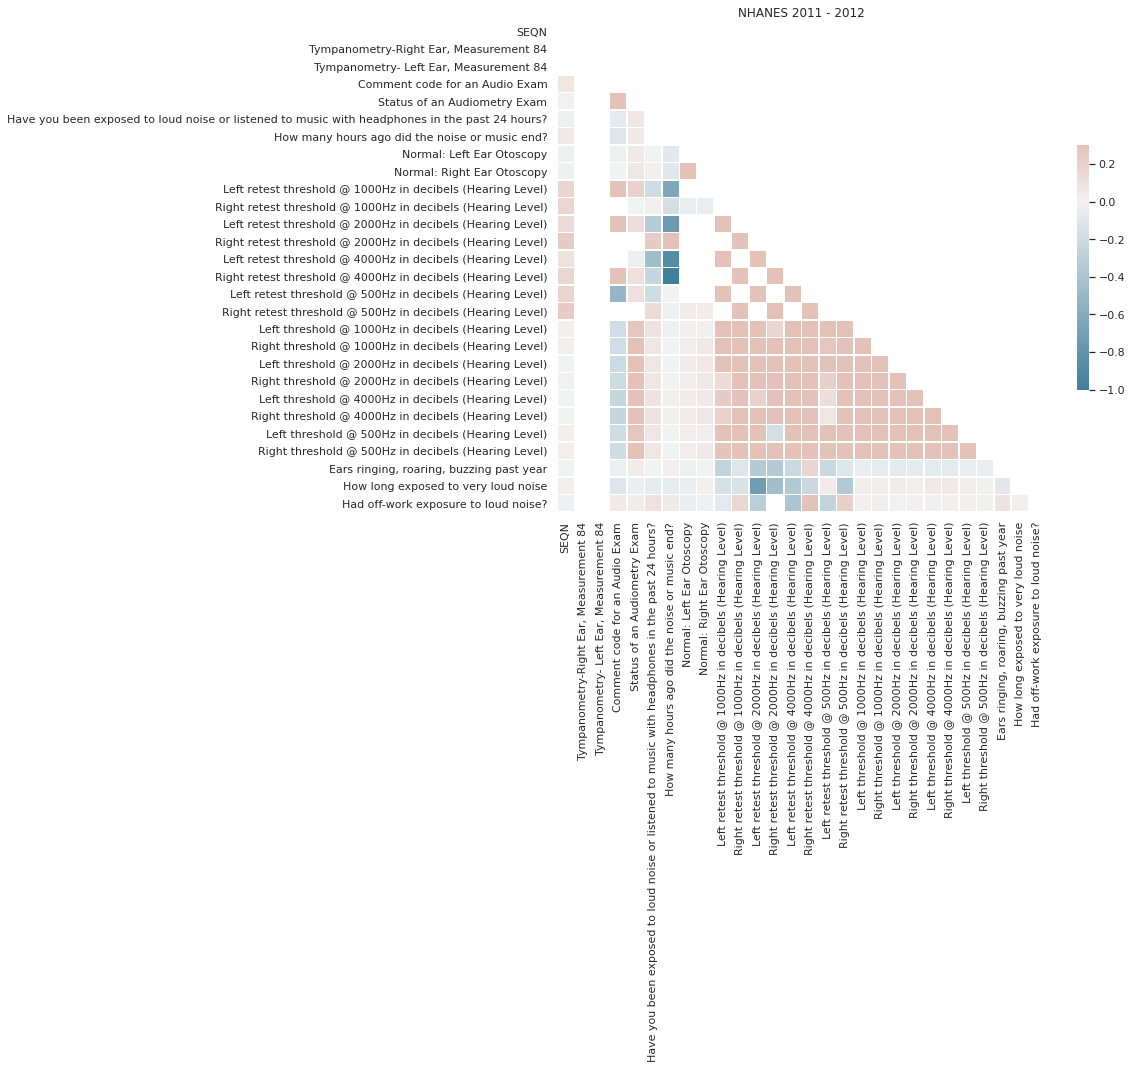

In [ ]:
# Compute the correlation matrix
corr = df7_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES 2011 - 2012');

### 2015 - 2016

In [ ]:
demo8 = pd.read_sas(prefix+'2015-2016/DEMO_I.XPT')
auq8 = pd.read_sas(prefix+'2015-2016/AUQ_I.XPT')
aux8 = pd.read_sas(prefix+'2015-2016/AUX_I.XPT')
auxar8 = pd.read_sas(prefix+'2015-2016/AUXAR_I.XPT')
auxtym8 = pd.read_sas(prefix+'2015-2016/AUXTYM_I.XPT')

df8 = (demo8.join(auq8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df8_filtered = df8.filter(
    [
     'SEQN',
     'AUATYMTL',
     'AUATYMTR',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ361',
     'AUQ370'
   ]
  )

df8_filtered.rename(columns = {
    'AUATYMTL': 'Tympanogram Type, Left Ear',
    'AUATYMTR': 'Tympanogram Type, Right Ear',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ360': 'How long exposed to very loud noise',
    'AUQ370': 'Had off-work exposure to loud noise?'
    },
    inplace = True
)

df8_filtered['years'] = '2015-2016'

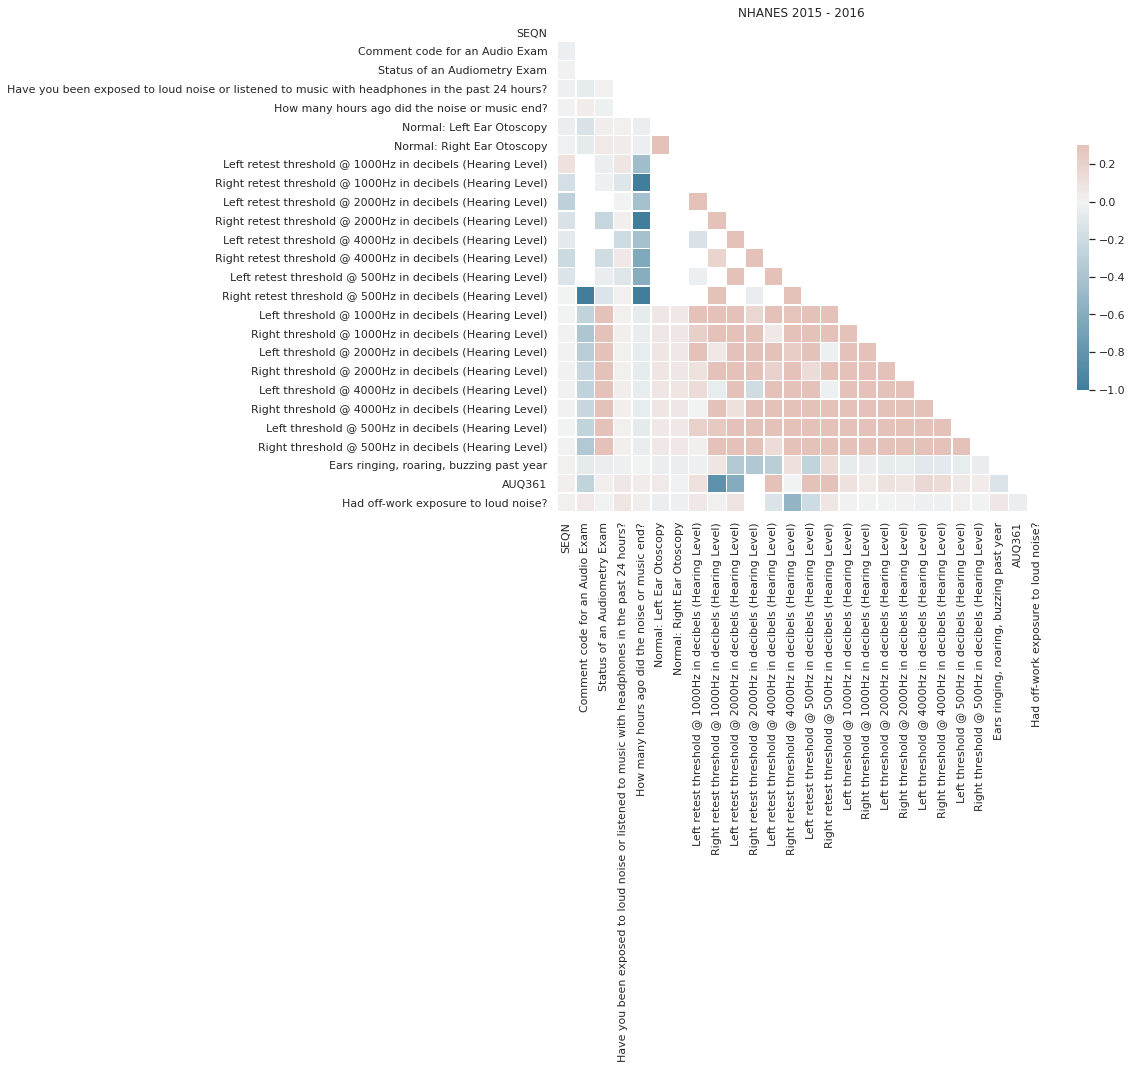

In [ ]:
# Compute the correlation matrix
corr = df8_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES 2015 - 2016');

### Appending dataframes into a single one

In [ ]:
df = (
    df4.append(df5)
       .append(df6)
       .append(df7)
       .append(df8)
       )

df = df.drop_duplicates()

df_filtered = (
    df4_filtered.append(df5_filtered)
       .append(df6_filtered)
       .append(df7_filtered)
       .append(df8_filtered)
)

df_filtered = df_filtered.drop_duplicates()
df_filtered = df_filtered.reset_index()

In [ ]:
df_filtered.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",AUQ361
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.0,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
1,3,31130.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,30.0,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.0,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN
4,7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.0,15.0,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN


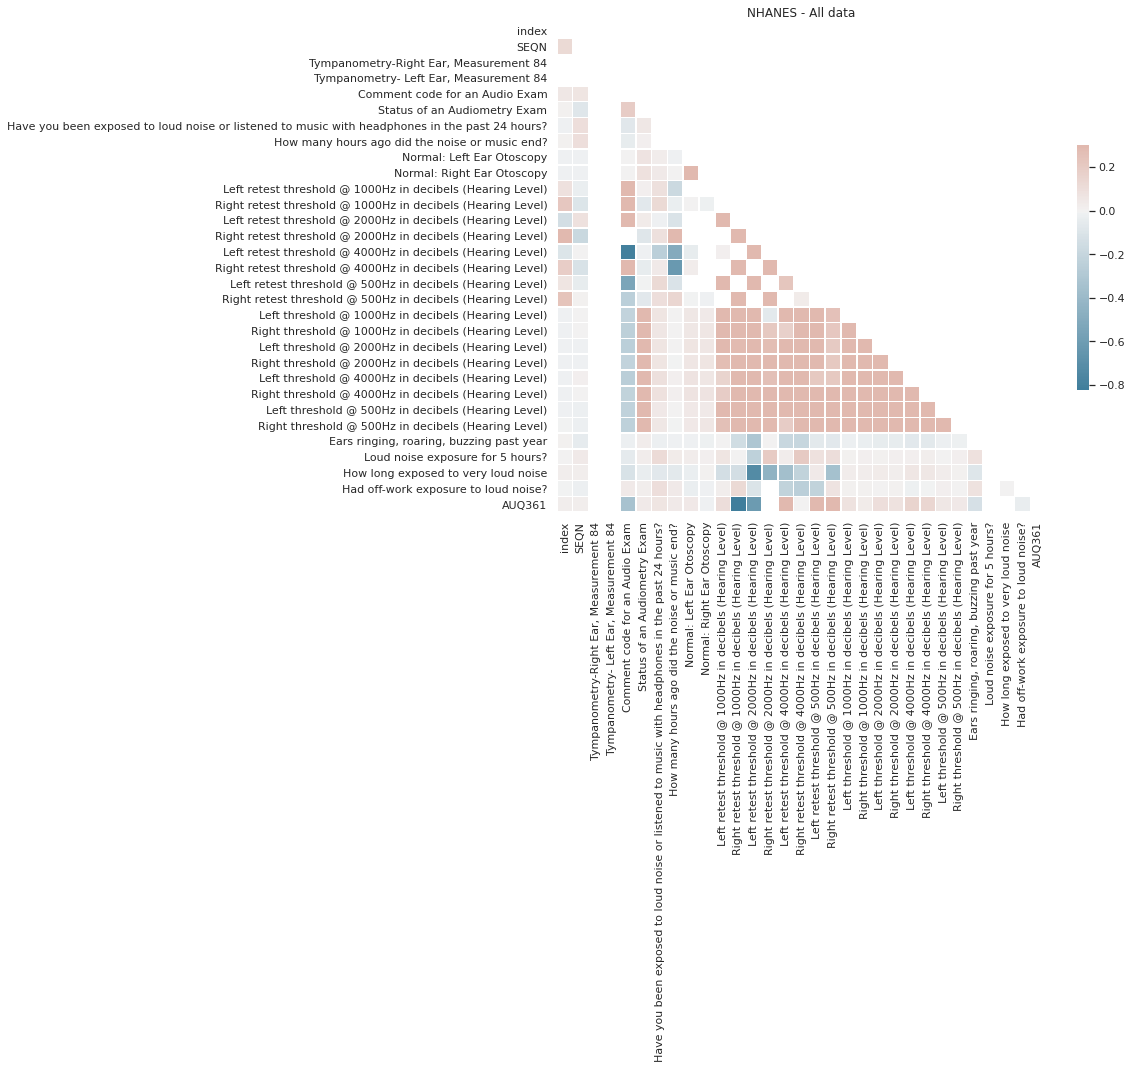

In [ ]:
# Compute the correlation matrix
corr = df_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('NHANES - All data');

## Passo 1 - Are otoscopies within nominal values?

In [ ]:
df_filtered[['years', 'Normal: Left Ear Otoscopy', 'Normal: Right Ear Otoscopy']].groupby('years').describe()

Normal: Left Ear Otoscopy                      ... Normal: Right Ear Otoscopy          
                              count      mean       std  ...                        50%  75%  max
years                                                    ...                                     
2005-2006                    2789.0  1.159197  0.365925  ...                        1.0  1.0  2.0
2007-2008                    1149.0  1.126197  0.332216  ...                        1.0  1.0  2.0
2009-2010                    2229.0  1.204127  0.403153  ...                        1.0  1.0  2.0
2011-2012                    3908.0  1.137155  0.344054  ...                        1.0  1.0  2.0
2015-2016                    4283.0  1.152230  0.359285  ...                        1.0  1.0  2.0

[5 rows x 16 columns]

1 = yes;
2 = no

há mais pessoas com sim que não em ambas as orelhas

In [ ]:
# Filtrando dataset para otoscopia normal
df_left = df_filtered[df_filtered['Normal: Left Ear Otoscopy'] == 1]
df_right = df_filtered[df_filtered['Normal: Right Ear Otoscopy'] == 1]

## Passo 2 - Tympanogram types

In [ ]:
# type_a = df8_filtered['Tympanogram Type, Left Ear'].unique()[0]

In [ ]:
# len(df8_filtered['SEQN'].unique())

In [ ]:
# len(df8_filtered[df8_filtered['Tympanogram Type, Left Ear'] == type_a]['SEQN'].unique())

In [ ]:
# df8_filtered['Tympanogram Left Ear'] = df8_filtered['Tympanogram Type, Left Ear'].apply(lambda x: 'Type A' if x == type_a else None)
# df8_filtered['Tympanogram Right Ear'] = df8_filtered['Tympanogram Type, Right Ear'].apply(lambda x: 'Type A' if x == type_a else None)

In [ ]:
# # Filter for type A tympanogram
# df8_left = df8_filtered[df8_filtered['Tympanogram Left Ear'] == 'Type A']
# df8_right = df8_filtered[df8_filtered['Tympanogram Right Ear'] == 'Type A']

# # Filter for normal otoscopy
# df8_left = df8_filtered[df8_filtered['Normal: Left Ear Otoscopy'] == 1]
# df8_left = df8_left.drop_duplicates()

# df8_right = df8_filtered[df8_filtered['Normal: Right Ear Otoscopy'] == 1]
# df8_right = df8_right.drop_duplicates()

# df8_left.head()

## Passos 3 e 4 - Média do hearing level


#### Orelha esquerda - média quadritonal

In [ ]:
 df_left['Left threshold @ 500Hz in decibels (Hearing Level)'].isnull().sum()

129

In [ ]:
df_left['Left retest threshold @ 500Hz in decibels (Hearing Level)'].isnull().sum()

11999

In [ ]:
df_left['Left threshold @ 500Hz in decibels (Hearing Level)'].head()

0    5.397605e-79
2    2.000000e+01
3    1.000000e+01
4    5.000000e+00
7    5.397605e-79
Name: Left threshold @ 500Hz in decibels (Hearing Level), dtype: float64

In [ ]:
df_left['Left @ 500Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 1000Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 2000Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 4000Hz in decibels (Hearing Level)'] = ''

for i in df_left.index:
  if df_left.loc[i, 'Left threshold @ 500Hz in decibels (Hearing Level)'] is None:
    df_left.loc[i, 'Left @ 500Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 500Hz in decibels (Hearing Level)']
  else:
    df_left.loc[i, 'Left @ 500Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 500Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 500Hz in decibels (Hearing Level)")

for i in df_left.index:
  if df_left.loc[i, 'Left threshold @ 1000Hz in decibels (Hearing Level)'] is None:
    df_left.loc[i, 'Left @ 1000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 1000Hz in decibels (Hearing Level)']
  else:
    df_left.loc[i, 'Left @ 1000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 1000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 1000Hz in decibels (Hearing Level)")

for i in df_left.index:
  if df_left.loc[i, 'Left threshold @ 2000Hz in decibels (Hearing Level)'] is None:
    df_left.loc[i, 'Left @ 2000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 2000Hz in decibels (Hearing Level)']
  else:
    df_left.loc[i, 'Left @ 2000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 2000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 2000Hz in decibels (Hearing Level)")

for i in df_left.index:
  if df_left.loc[i, 'Left threshold @ 4000Hz in decibels (Hearing Level)'] is None:
    df_left.loc[i, 'Left @ 4000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 4000Hz in decibels (Hearing Level)']
  else:
    df_left.loc[i, 'Left @ 4000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 4000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 4000Hz in decibels (Hearing Level)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Done creating column Left @ 500Hz in decibels (Hearing Level)
Done creating column Left @ 1000Hz in decibels (Hearing Level)
Done creating column Left @ 2000Hz in decibels (Hearing Level)
Done creating column Left @ 4000Hz in decibels (Hearing Level)


In [ ]:
df_left.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",AUQ361,Left @ 500Hz in decibels (Hearing Level),Left @ 1000Hz in decibels (Hearing Level),Left @ 2000Hz in decibels (Hearing Level),Left @ 4000Hz in decibels (Hearing Level)
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.000000e+00,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,5,10
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,3.000000e+01,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,20,10,30,65
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.000000e+00,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,10,5.39761e-79,-5,5.39761e-79
4,7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.0,1.500000e+01,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5,5,15,95
7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,-5.0,5.397605e-79,-5.0,5.397605e-79,5.000000e+00,5.397605e-79,5.397605e-79,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,5.39761e-79,5.39761e-79


In [ ]:
df_left['Left @ 500Hz in decibels (Hearing Level)'].isnull().sum()

129

In [ ]:
df_left['Left Ear - Quadritonal Mean Value'] = (
    (
     df_left['Left @ 500Hz in decibels (Hearing Level)'] + 
     df_left['Left @ 1000Hz in decibels (Hearing Level)'] + 
     df_left['Left @ 2000Hz in decibels (Hearing Level)'] +
     df_left['Left @ 4000Hz in decibels (Hearing Level)']
    ) / 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_left['Left Ear - Quadritonal Mean Value'].isnull().sum()

131

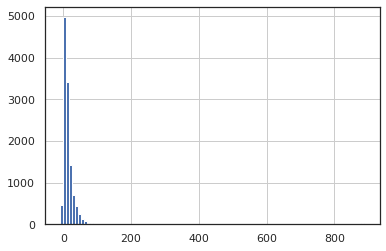

In [ ]:
df_left['Left Ear - Quadritonal Mean Value'].hist(bins = 100);

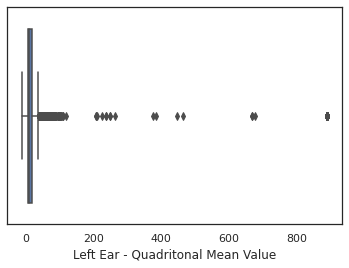

In [ ]:
sns.boxplot(data = df_left, x = 'Left Ear - Quadritonal Mean Value');

In [ ]:
df_left['Left Ear - Quadritonal Mean Value'].describe()

count     11995.0
unique      108.0
top           5.0
freq        875.0
Name: Left Ear - Quadritonal Mean Value, dtype: float64

#### Orelha direita - Média Quadritonal

In [ ]:
 df_right['Right threshold @ 500Hz in decibels (Hearing Level)'].isnull().sum()

117

In [ ]:
df_right['Right retest threshold @ 500Hz in decibels (Hearing Level)'].isnull().sum()

11808

In [ ]:
df_right['Right threshold @ 500Hz in decibels (Hearing Level)'].head()

0    1.000000e+01
2    2.000000e+01
3    5.397605e-79
7    5.397605e-79
8    2.000000e+01
Name: Right threshold @ 500Hz in decibels (Hearing Level), dtype: float64

In [ ]:
df_right['Right @ 500Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 1000Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 2000Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 4000Hz in decibels (Hearing Level)'] = ''

for i in df_right.index:
  if df_right.loc[i, 'Right threshold @ 500Hz in decibels (Hearing Level)'] is None:
    df_right.loc[i, 'Right @ 500Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 500Hz in decibels (Hearing Level)']
  else:
    df_right.loc[i, 'Right @ 500Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 500Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 500Hz in decibels (Hearing Level)")

for i in df_right.index:
  if df_right.loc[i, 'Right threshold @ 1000Hz in decibels (Hearing Level)'] is None:
    df_right.loc[i, 'Right @ 1000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 1000Hz in decibels (Hearing Level)']
  else:
    df_right.loc[i, 'Right @ 1000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 1000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 1000Hz in decibels (Hearing Level)")

for i in df_right.index:
  if df_right.loc[i, 'Right threshold @ 2000Hz in decibels (Hearing Level)'] is None:
    df_right.loc[i, 'Right @ 2000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 2000Hz in decibels (Hearing Level)']
  else:
    df_right.loc[i, 'Right @ 2000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 2000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 2000Hz in decibels (Hearing Level)")

for i in df_right.index:
  if df_right.loc[i, 'Right threshold @ 4000Hz in decibels (Hearing Level)'] is None:
    df_right.loc[i, 'Right @ 4000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 4000Hz in decibels (Hearing Level)']
  else:
    df_right.loc[i, 'Right @ 4000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 4000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 4000Hz in decibels (Hearing Level)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Done creating column Right @ 500Hz in decibels (Hearing Level)
Done creating column Right @ 1000Hz in decibels (Hearing Level)
Done creating column Right @ 2000Hz in decibels (Hearing Level)
Done creating column Right @ 4000Hz in decibels (Hearing Level)


In [ ]:
df_right['Right @ 500Hz in decibels (Hearing Level)'].isnull().sum()

117

In [ ]:
df_right['Right Ear - Quadritonal Mean Value'] = (
    (
     df_right['Right @ 500Hz in decibels (Hearing Level)'] + 
     df_right['Right @ 1000Hz in decibels (Hearing Level)'] + 
     df_right['Right @ 2000Hz in decibels (Hearing Level)'] +
     df_right['Right @ 4000Hz in decibels (Hearing Level)']
    ) / 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_right['Right Ear - Quadritonal Mean Value']

0         8.75
2        38.75
3         -2.5
7        -1.25
8         8.75
         ...  
15389    81.25
15390      7.5
15391     3.75
15392     12.5
15394     8.75
Name: Right Ear - Quadritonal Mean Value, Length: 11916, dtype: object

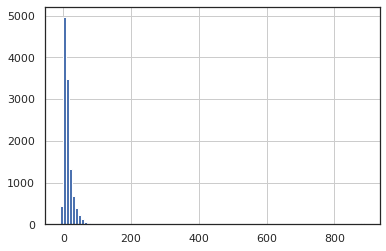

In [ ]:
df_right['Right Ear - Quadritonal Mean Value'].hist(bins = 100);

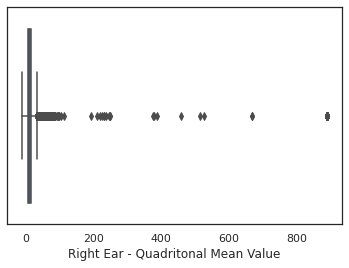

In [ ]:
sns.boxplot(data = df_right, x = 'Right Ear - Quadritonal Mean Value');

In [ ]:
df_right['Right Ear - Quadritonal Mean Value'].describe()

count     11792.0
unique      103.0
top           5.0
freq        873.0
Name: Right Ear - Quadritonal Mean Value, dtype: float64

## Passo 5 - Classificar quanto ao grau de audição da OD

In [ ]:
classification_order = ['Normal hearing', 'Mild', 'Moderate', 'Moderately Severe', 'Severe', 'Profound', 'Complete hearing loss']

In [ ]:
def hearing_classification(df, ear):
  df[ear + ' - Hearing Loss Class'] = ''

  for i in df.index:
    if df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 20:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Normal hearing'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 35:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Mild'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 50:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Moderate'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 65:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Moderately Severe'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 80:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Severe'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 95:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Profound'
    elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] >= 95:
      df.loc[i, ear + 'Hearing Loss Class'] = 'Complete hearing loss'
    else:
      pass
  
  return print('Done')

In [ ]:
hearing_classification(df_right, 'Right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Done


In [ ]:
df_right.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",AUQ361,Right @ 500Hz in decibels (Hearing Level),Right @ 1000Hz in decibels (Hearing Level),Right @ 2000Hz in decibels (Hearing Level),Right @ 4000Hz in decibels (Hearing Level),Right Ear - Quadritonal Mean Value,Right - Hearing Loss Class,RightHearing Loss Class
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.000000e+00,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,10,15,5,5,8.75,,Normal hearing
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,3.000000e+01,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,20,15,20,100,38.75,,Moderate
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.000000e+00,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,-5,5.39761e-79,-2.5,,Normal hearing
7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,-5.0,5.397605e-79,-5.0,5.397605e-79,5.000000e+00,5.397605e-79,5.397605e-79,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,-5,5,-1.25,,Normal hearing
8,16,31143.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.0,5.397605e-79,10.0,5.000000e+00,5.397605e-79,1.500000e+01,2.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,20,5,10,5.39761e-79,8.75,,Normal hearing


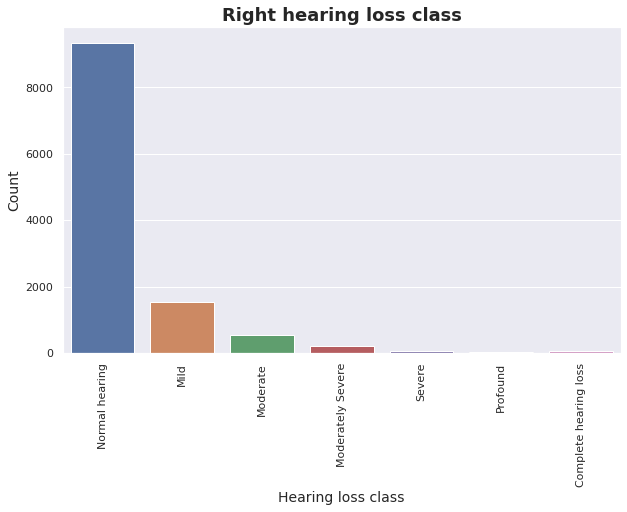

In [ ]:
plt.subplots(figsize = (10,6))
ax = sns.countplot(x = 'RightHearing Loss Class',
              data = df_right,
              order = classification_order);
ax.set_title('Right hearing loss class',fontsize = 18, fontweight='bold');
ax.set_xlabel('Hearing loss class', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
df_right['RightHearing Loss Class'].value_counts()

Normal hearing           9349
Mild                     1526
Moderate                  551
Moderately Severe         208
Severe                     72
Complete hearing loss      65
Profound                   21
Name: RightHearing Loss Class, dtype: int64

In [ ]:
df_right['RightHearing Loss Class'].count()

11792

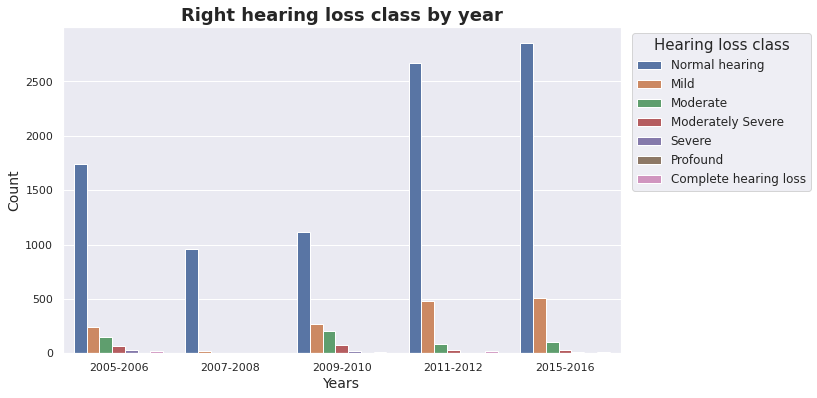

In [ ]:
plt.subplots(figsize = (10,6))
ax = sns.countplot(data = df_right,
              x = 'years',
              hue = 'RightHearing Loss Class',
              hue_order = classification_order);
ax.set_title('Right hearing loss class by year',fontsize = 18, fontweight='bold');
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.legend(fontsize = 12,
          bbox_to_anchor= (1.01, 1),
          title="Hearing loss class",
          title_fontsize = 15);

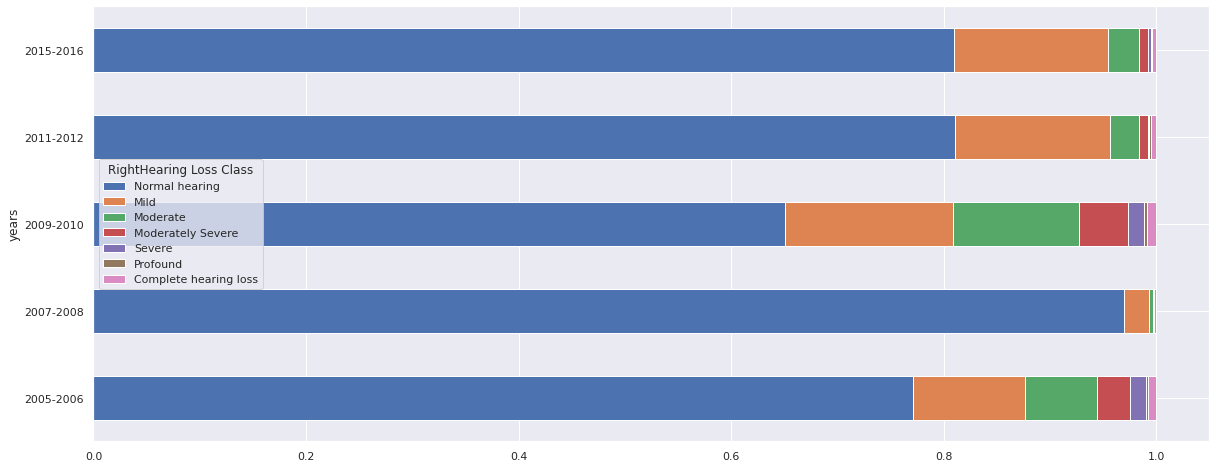

In [ ]:
# Get count of each year by classification
df_right_by_class = df_right.groupby(['years', 'RightHearing Loss Class']).size().reset_index().pivot(columns='RightHearing Loss Class', index='years', values=0)
# Calculating percentage by year
df_right_by_class_percentage = df_right_by_class.div(df_right_by_class.sum(axis=1), axis=0)
# Reordering columns
df_right_by_class_percentage = df_right_by_class_percentage[classification_order]
df_right_by_class_percentage.plot(kind='barh', stacked=True, figsize=(20,8));

## Passo 5 - Classificar quanto ao grau de audição da OE

In [ ]:
hearing_classification(df_left, 'Left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Done


In [ ]:
df_left.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",AUQ361,Left @ 500Hz in decibels (Hearing Level),Left @ 1000Hz in decibels (Hearing Level),Left @ 2000Hz in decibels (Hearing Level),Left @ 4000Hz in decibels (Hearing Level),Left Ear - Quadritonal Mean Value,Left - Hearing Loss Class,LeftHearing Loss Class
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.000000e+00,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,5,10,2.5,,Normal hearing
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,3.000000e+01,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,20,10,30,65,31.25,,Mild
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.000000e+00,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,10,5.39761e-79,-5,5.39761e-79,1.25,,Normal hearing
4,7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.0,1.500000e+01,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5,5,15,95,30,,Mild
7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,-5.0,5.397605e-79,-5.0,5.397605e-79,5.000000e+00,5.397605e-79,5.397605e-79,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.39761e-79,-5,5.39761e-79,5.39761e-79,-1.25,,Normal hearing


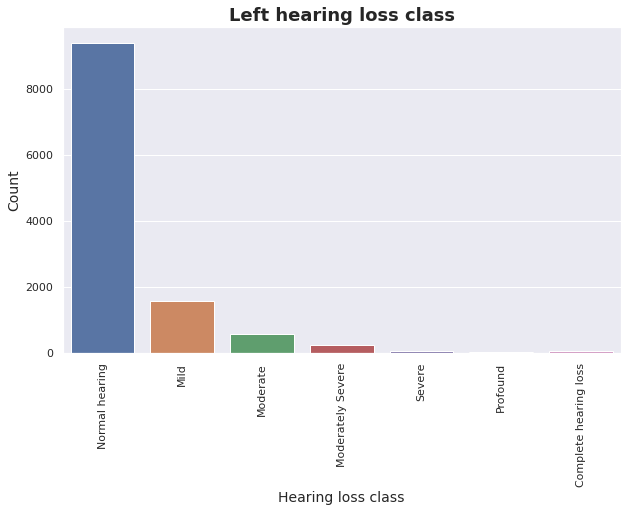

In [ ]:
plt.subplots(figsize = (10,6))
ax = sns.countplot(x = 'LeftHearing Loss Class',
                   data = df_left,
                   order = classification_order);
ax.set_title('Left hearing loss class',fontsize = 18, fontweight='bold');
ax.set_xlabel('Hearing loss class', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
df_left['LeftHearing Loss Class'].value_counts()

Normal hearing           9410
Mild                     1574
Moderate                  588
Moderately Severe         249
Severe                     80
Complete hearing loss      68
Profound                   26
Name: LeftHearing Loss Class, dtype: int64

In [ ]:
df_left['LeftHearing Loss Class'].count()

11995

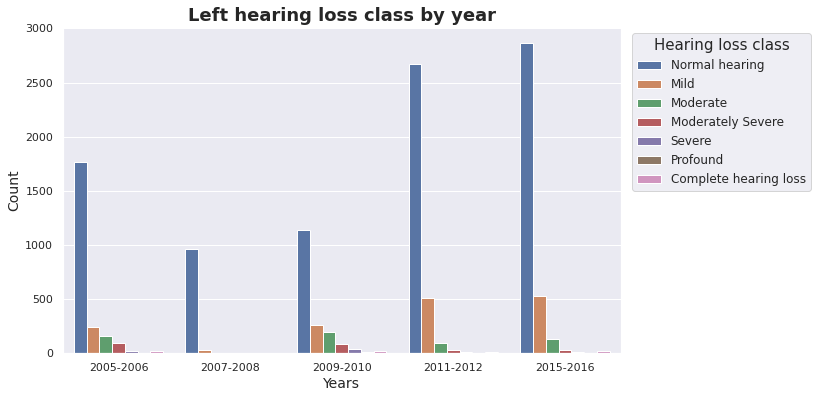

In [ ]:
plt.subplots(figsize = (10,6))
ax = sns.countplot(data = df_left,
              x = 'years',
              hue = 'LeftHearing Loss Class',
              hue_order = classification_order);
ax.set_title('Left hearing loss class by year', fontsize = 18, fontweight='bold');
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.legend(fontsize = 12,
          bbox_to_anchor= (1.01, 1),
          title="Hearing loss class",
          title_fontsize = 15);

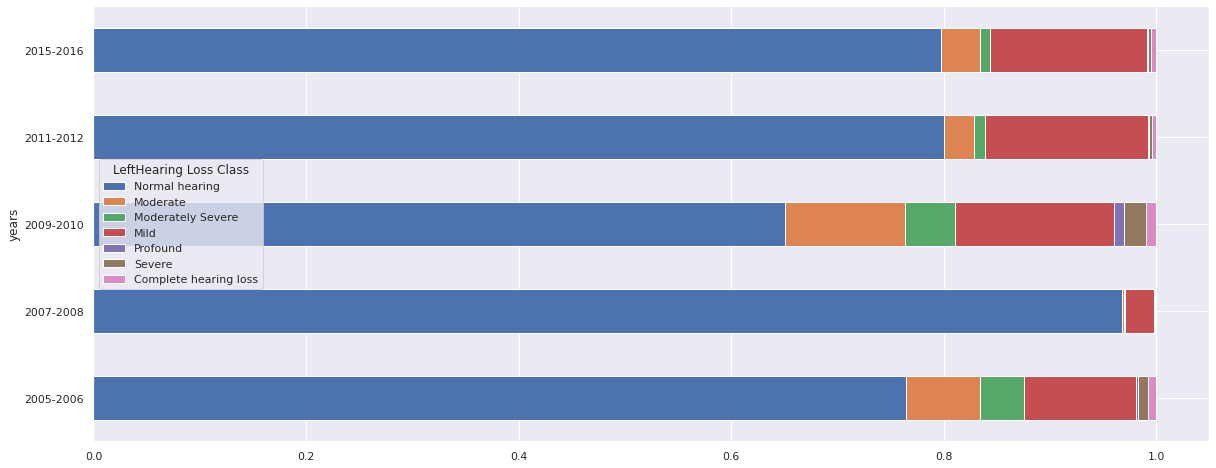

In [ ]:
# Get count of each year by classification
df_left_by_class = df_left.groupby(['years', 'LeftHearing Loss Class']).size().reset_index().pivot(columns='LeftHearing Loss Class', index='years', values=0)
# Calculating percentage by year
df_left_by_class_percentage = df_left_by_class.div(df_left_by_class.sum(axis=1), axis=0)
# Reordering columns
df_left_by_class_percentage = df_left_by_class_percentage[['Normal hearing', 'Moderate', 'Moderately Severe', 'Mild', 'Profound', 'Severe', 'Complete hearing loss']]
df_left_by_class_percentage.plot(kind='barh', stacked=True, figsize=(20,8));